In [1]:
import glob
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
compound_paths = glob.glob('/data/sahre/projects/atomic-energies/data/bonding_trends/diatomics/*/')
energies = dict()
for c in compound_paths:
    comp = c.split('/')[-2]
    
    energies[comp] = np.loadtxt(os.path.join(c, 'atomic_energies.txt'))

In [3]:
# compound_paths = glob.glob('/data/sahre/projects/atomic-energies/data/bonding_trends/*/')
# nuc_rep = dict()
# for c in compound_paths:
#     comp = c.split('/')[-2]
    
#     nuc_rep[comp] = np.loadtxt(os.path.join(c, 'nuc_rep.txt'))

In [5]:
cx = ['CC', 'CN', 'CO', 'CF']
c_energies = []
for c in cx:
    c_energies.append(energies[c][:,-1][0])
    
nx = ['CN', 'NN', 'NO', 'NF']
n_energies = []
for i, c in enumerate(nx):
    if i == 0:
        n_energies.append(energies[c][:,-1][1])
    else:
        n_energies.append(energies[c][:,-1][0])
        
ox = ['CO', 'NO', 'OO', 'OF']
o_energies = []
for i, c in enumerate(ox):
    if i < 2:
        o_energies.append(energies[c][:,-1][1])
    else:
        o_energies.append(energies[c][:,-1][0])
        
fx = ['CF', 'NF', 'OF', 'FF']
f_energies = []
for i, c in enumerate(fx):
    if i < 3:
        f_energies.append(energies[c][:,-1][1])
    else:
        f_energies.append(energies[c][:,-1][0])
    
z = np.array([6,7,8,9])

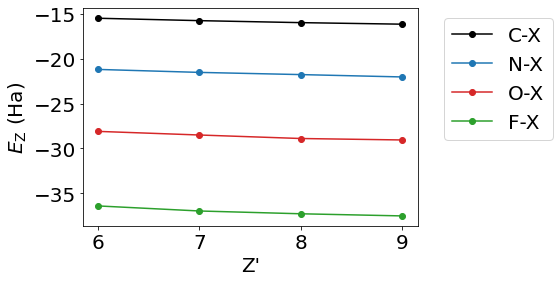

In [6]:
plt.rcParams['font.size'] = 20
plt.plot(z, c_energies, '-o', color='black', label = 'C-X')
plt.plot(z, n_energies, '-o', color='tab:blue', label = 'N-X')
plt.plot(z, o_energies, '-o', color='tab:red', label = 'O-X')
plt.plot(z, f_energies, '-o', color='tab:green', label = 'F-X')
plt.xlabel('Z\'' )
plt.ylabel(r'$E_{\rm{Z}}$ (Ha)')
plt.legend(bbox_to_anchor=(1.05, 1.0))

In [7]:
from scipy.stats import linregress
yx_en = np.array([c_energies, n_energies, o_energies, f_energies])
r2 = []
lf = []
slope = []
intercept = []
for yx in yx_en:
    res = linregress(z, yx)
    lf.append(res)
    r2.append(res[2]**2)
    slope.append(res[0])
    intercept.append(res[1])

In [8]:
linregress(z, yx)

LinregressResult(slope=-0.36527419373379216, intercept=-34.309853787129015, rvalue=-0.9794446744362152, pvalue=0.020555325563784806, stderr=0.05319342415337402, intercept_stderr=0.4033591097976385)

Text(0, 0.5, '$r^2$')

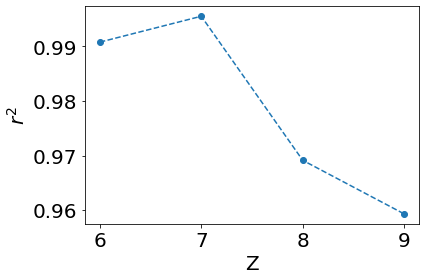

In [9]:
plt.plot(z,r2, '--o')
plt.xlabel('Z')
plt.ylabel(r'$r^2$')

In [10]:
mae = []
for i in range(4):
    mae.append(np.abs(yx_en[i]-(z*lf[i][0]+lf[i][1])).mean())

Text(0, 0.5, 'MAE (Ha)')

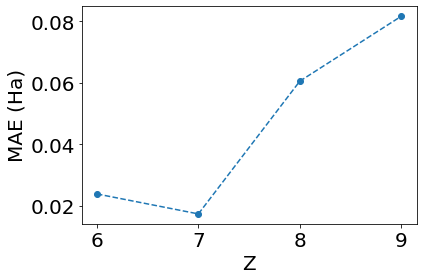

In [11]:
plt.plot(z,mae, '--o')
plt.xlabel('Z')
plt.ylabel(r'MAE (Ha)')

Text(0, 0.5, 'slope (Ha/e)')

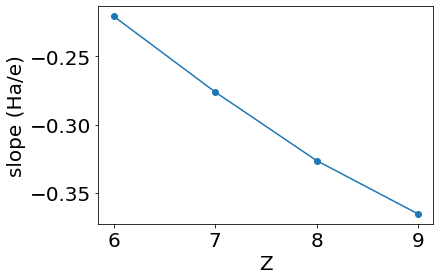

In [12]:
plt.plot(z, slope, '-o')
plt.xlabel('Z')
plt.ylabel('slope (Ha/e)')

Text(0, 0.5, 'intercept (Ha)')

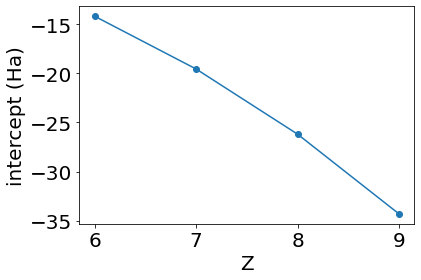

In [13]:
plt.plot(z, intercept, '-o')
plt.xlabel('Z')
plt.ylabel('intercept (Ha)')

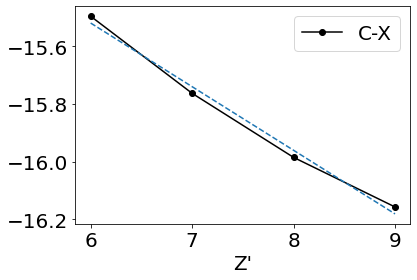

In [14]:
plt.plot(z, c_energies, '-o', color='black', label = 'C-X')
plt.plot(z, z*lf[0][0]+lf[0][1], '--')
plt.xlabel('Z\'')
plt.legend()
# plt.plot(z, n_energies, '-o', label = 'N-X')
# plt.plot(z, o_energies, '-o', label = 'O-X')

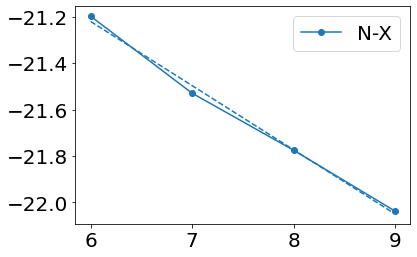

In [15]:
plt.plot(z, n_energies, '-o', color='tab:blue', label = 'N-X')
plt.plot(z, z*lf[1][0]+lf[1][1], '--')
plt.legend()

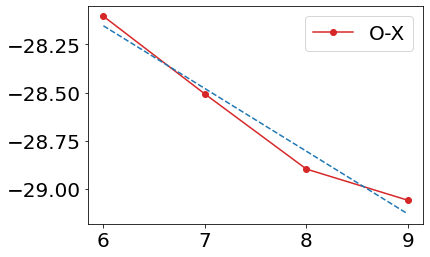

In [16]:
plt.plot(z, o_energies, '-o', color='tab:red', label = 'O-X')
plt.plot(z, z*lf[2][0]+lf[2][1], '--')
plt.legend()

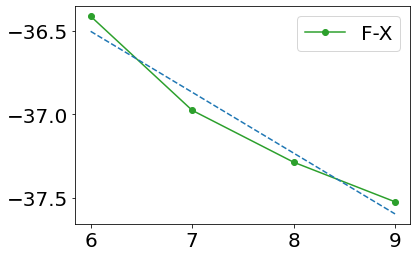

In [17]:
plt.plot(z, f_energies, '-o', color='tab:green', label = 'F-X')
plt.plot(z, z*lf[3][0]+lf[3][1], '--')
plt.legend()